In [47]:
import pandas as pd
from src.topic_eval import (
    topic_in_numbers,
    wordcloud,
    stackplot_topic_by_language,
    stackplot_topic_by_sentiment,
)

df_word_freq = pd.read_csv(
    "/Users/robinfeldmann/TopicAnalysisRUWTweets/Topics_10/Topics_0/word_freq.csv"
)
df_word_freq = df_word_freq.rename(columns={"Unnamed: 0": "word"})
df_word_freq = df_word_freq[~df_word_freq["word"].isna()]

df_counts = pd.read_csv(
    "/Users/robinfeldmann/TopicAnalysisRUWTweets/Topics_10/Topics_0/count_agg.csv"
)

df_sentiments = pd.read_csv(
    "/Users/robinfeldmann/TopicAnalysisRUWTweets/Topics_10/Topics_0/sentiments_agg.csv"
)
df_sentiments = df_sentiments[df_sentiments["sentiment_label"] != "error"]

df_lang = pd.read_csv(
    "/Users/robinfeldmann/TopicAnalysisRUWTweets/Topics_10/Topics_0/lang_agg.csv"
)

topic = "0"
from collections import Counter


# Counter from dataframe
def get_counters(
    df_freq: pd.DataFrame, topics: list[str] = [str(x) for x in range(10)]
):
    counters = []
    for topic in topics:
        k = Counter()

        def app(x):
            if x[topic] > 0:
                k[x["word"]] += int(x[topic])

        df_freq.apply(app, axis=1)
        counters.append(k)
    return counters


all_counters = get_counters(df_word_freq)

In [3]:
topic_in_numbers("0", df_counts, df_lang, df_sentiments)

Tweets in Topic:  2169884
Of all tweets:     11.86% 
Of which are:
Positive:      2.45%
Neutral:     30.53%
Negativ:     67.02%

Divided in Languages by:
de:      4.51%
en:     73.79%
es:      7.03%
fr:      5.82%
it:      4.14%
ru:      2.80%
uk:      1.91%


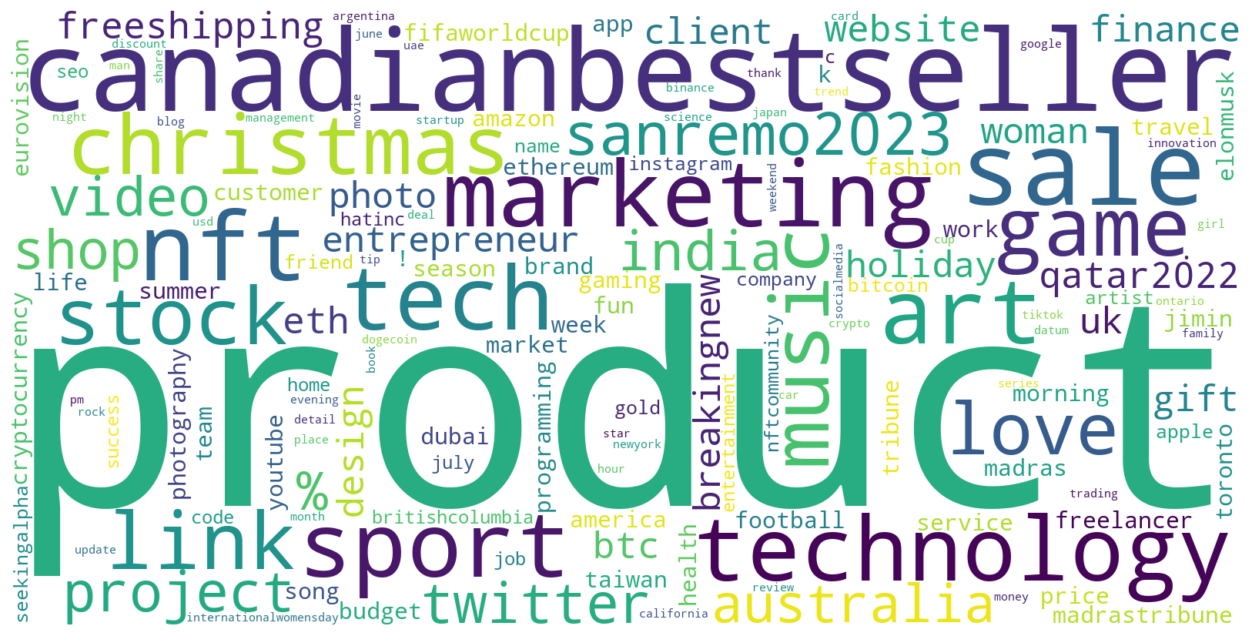

In [12]:
wordcloud(get_counters(df_word_freq, ["0"])[0])

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


def stackplot_topic_by_language(
    df: pd.DataFrame,
    topic: str,
    save_path: str = None,
) -> None:
    """
    Plots sum over weeks of the aggregated df for each language.
    """

    fig, ax = plt.subplots()
    df = df.query(f"topic=={topic}").query("months<'2023-05'")

    all_counts = (
        df.query(f"topic=={topic}")
        .query("months<'2023-05'")
        .groupby("months")
        .sum()
        .reset_index()["lang_count"]
        .values
    )

    ax.stackplot(
        df["months"].unique(),
        [
            df.query(f"topic=={topic}").query(f"lang=='{x}'")["lang_count"] / all_counts
            for x in df["lang"].unique()
        ],
        labels=[str(x) for x in df["lang"].unique()],
        alpha=0.8,
    )

    ax.legend(loc="upper left")
    ax.set_title(
        f"Number of Tweets per Language per Month in Percent for Topic {topic}"
    )
    ax.set_xlabel("Month")

    ax.set_ylabel("Number of Tweets per Week in %")

    if save_path:
        plt.savefig(save_path)
    plt.show()


def stackplot_topic_by_sentiment(
    df: pd.DataFrame,
    topic: str,
    save_path: str = None,
) -> None:
    """
    Plots sum over weeks of the aggregated df for each language.
    """

    fig, ax = plt.subplots()

    ax.stackplot(
        df["months"].unique(),
        [
            df.query(f"topic=={topic}").query(f"sentiment_label=='{x}'")[
                "sentiment_count"
            ]
            for x in df["sentiment_label"].unique()
        ],
        labels=[str(x) for x in df["sentiment_label"].unique()],
        alpha=0.8,
    )
    ax.legend(loc="upper left")
    ax.set_title(f"Number of Sentiment Labelled Tweets per Month for Topic {topic}")
    ax.set_xlabel("Month")

    ax.set_ylabel("Number of Sentiment Labelled Tweets per Week")

    if save_path:
        plt.savefig(save_path)
    plt.show()


def plots(df_lang: pd.DataFrame, df_sent: pd.DataFrame ,topic: str, save_path: str = None) -> None:
    sns.set_theme(style="whitegrid")

    plt.rcParams["figure.figsize"] = [22, 13]
    # plt.tight_layout()
    plt.tight_layout(pad=0)
    sns.set_style("white")
    plt.subplots_adjust(left=0.1, right=0.5, hspace=0, wspace=0)
    # plt.tight_layout()
    fig, axs = plt.subplots(2)

    df_lang = df_lang.query(f"topic=={topic}").query("months<'2023-05'")
    df_sent = df_sent.query(f"topic=={topic}").query("months<'2023-05'")
    all_counts = (
        df_lang.query(f"topic=={topic}")
        .query("months<'2023-05'")
        .groupby("months")
        .sum()
        .reset_index()["lang_count"]
        .values
    )

    axs[0].stackplot(
        df_lang["months"].unique(),
        [
            df_lang.query(f"topic=={topic}").query(f"lang=='{x}'")["lang_count"] / all_counts
            for x in df_lang["lang"].unique()
        ],
        labels=[str(x) for x in df_lang["lang"].unique()],
        alpha=0.8,
    )

    axs[0].legend(loc="upper left")
    axs[0].set_title(
        f"Number of Tweets per Language per Month in Percent for Topic {topic}"
    )
    axs[0].set_xlabel("Month")

    axs[0].set_ylabel("Number of Tweets per Week in %")


    axs[1].stackplot(
        df_sent["months"].unique(),
        [
            df_sent.query(f"topic=={topic}").query(f"sentiment_label=='{x}'")[
                "sentiment_count"
            ]
            for x in df_sent["sentiment_label"].unique()
        ],
        labels=[str(x) for x in df_sent["sentiment_label"].unique()],
        alpha=0.8,
    )
    axs[1].legend(loc="upper left")
    axs[1].set_title(f"Number of Sentiment Labelled Tweets per Month for Topic {topic}")
    axs[1].set_xlabel("Month")

    axs[1].set_ylabel("Number of Sentiment Labelled Tweets per Week")
    if save_path:
        plt.savefig(save_path)

    #plt.show()

<Figure size 2200x1300 with 0 Axes>

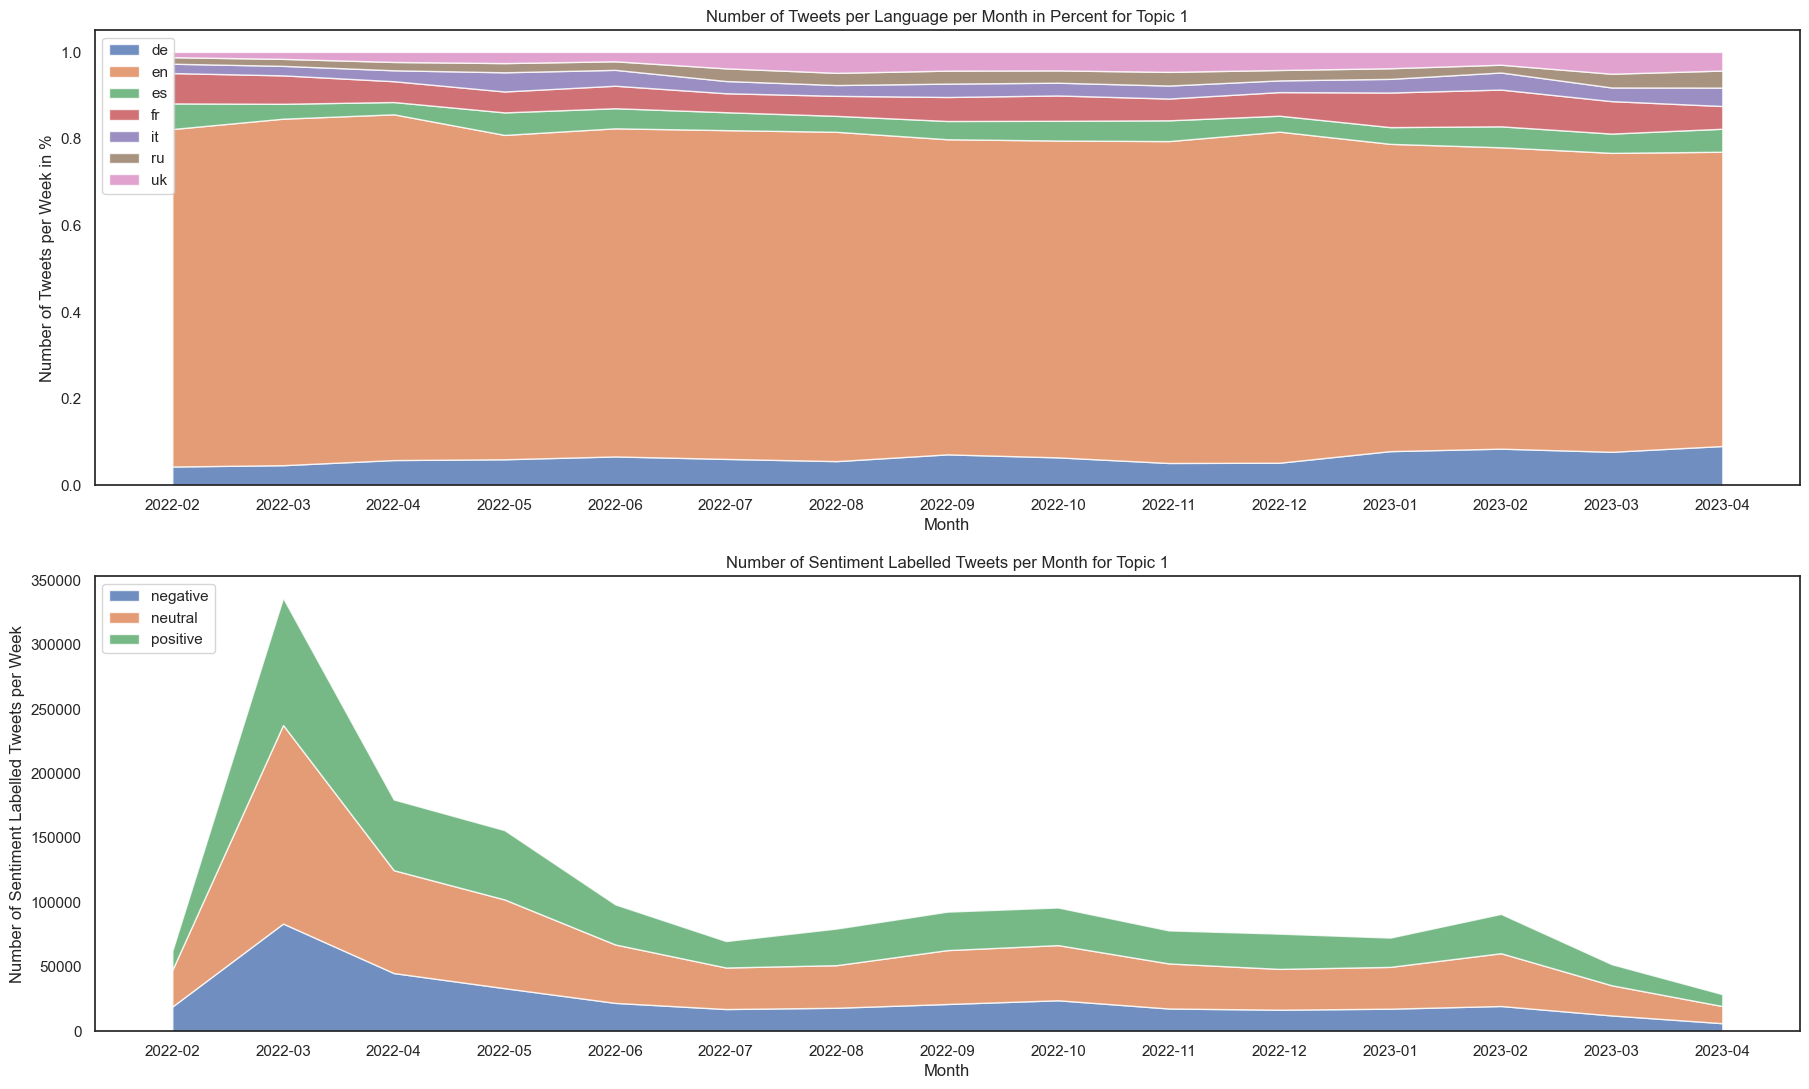

In [51]:
plots(df_lang, df_sentiments,topic= "1")

<Figure size 2200x1300 with 0 Axes>

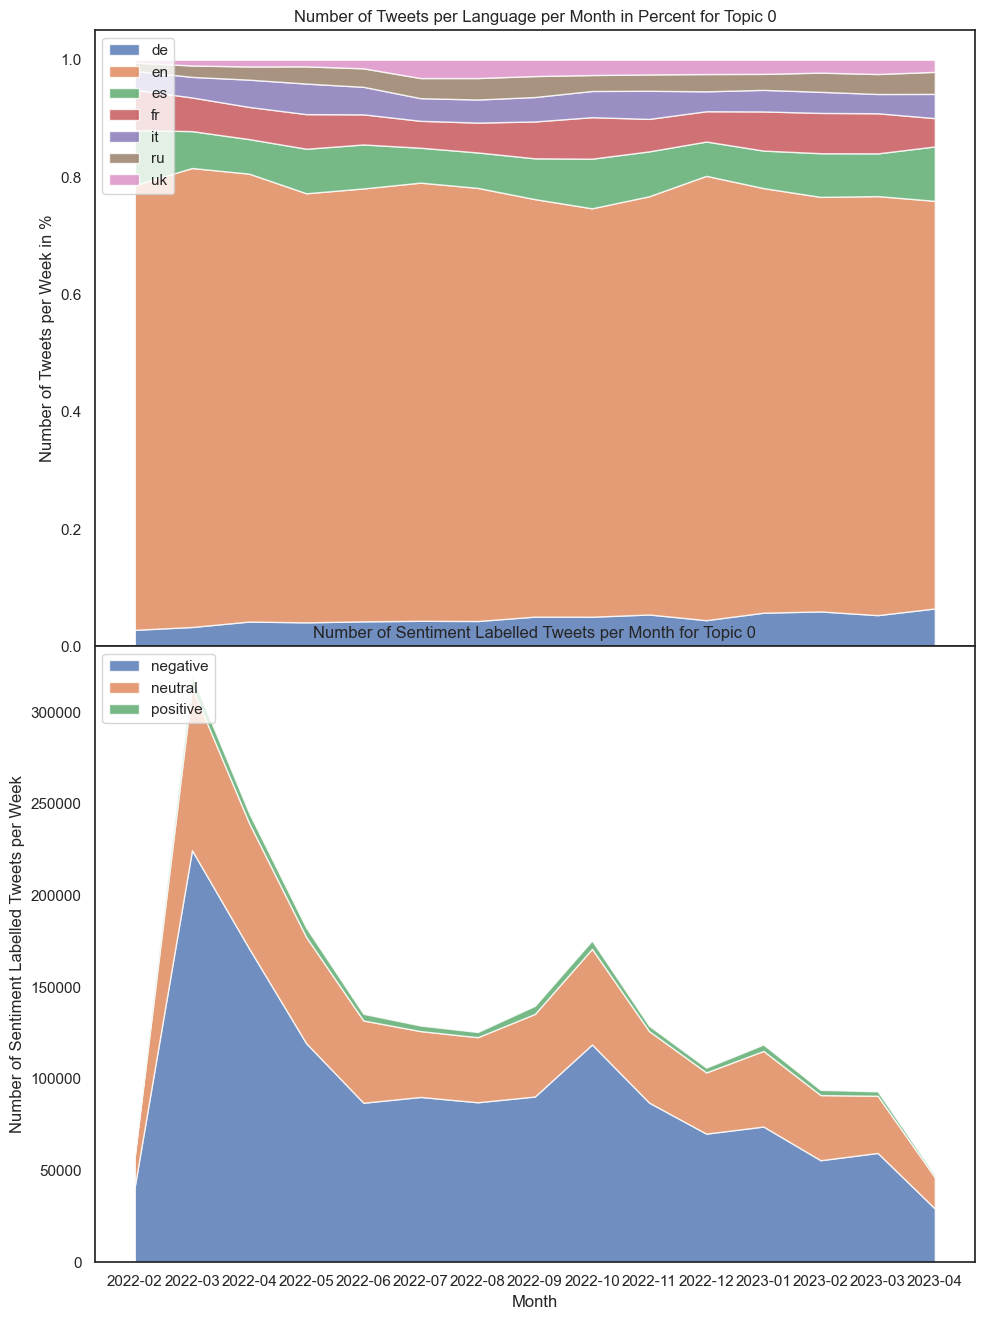

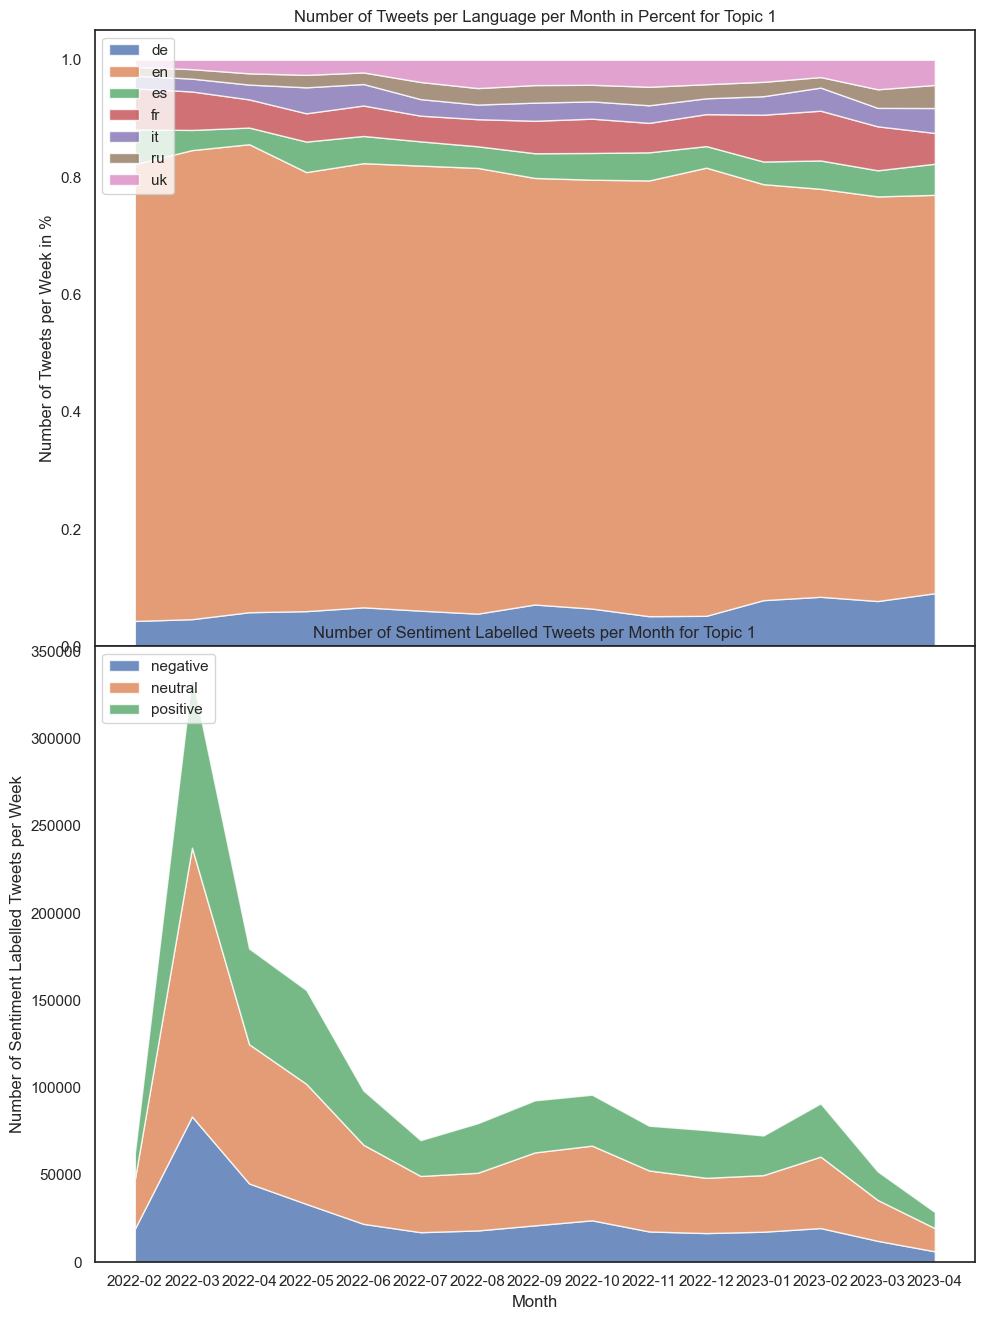

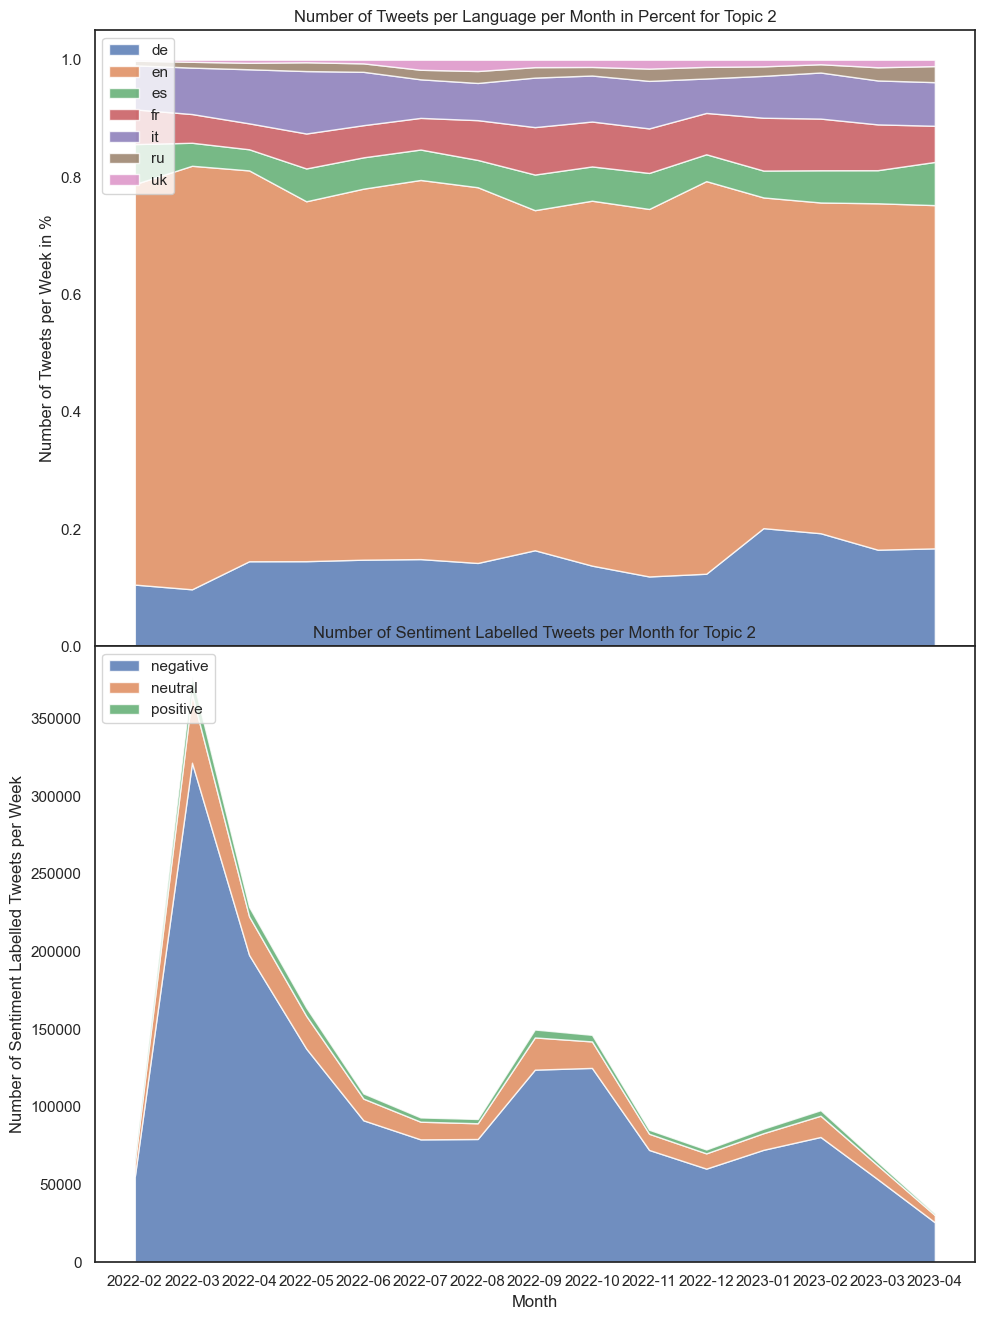

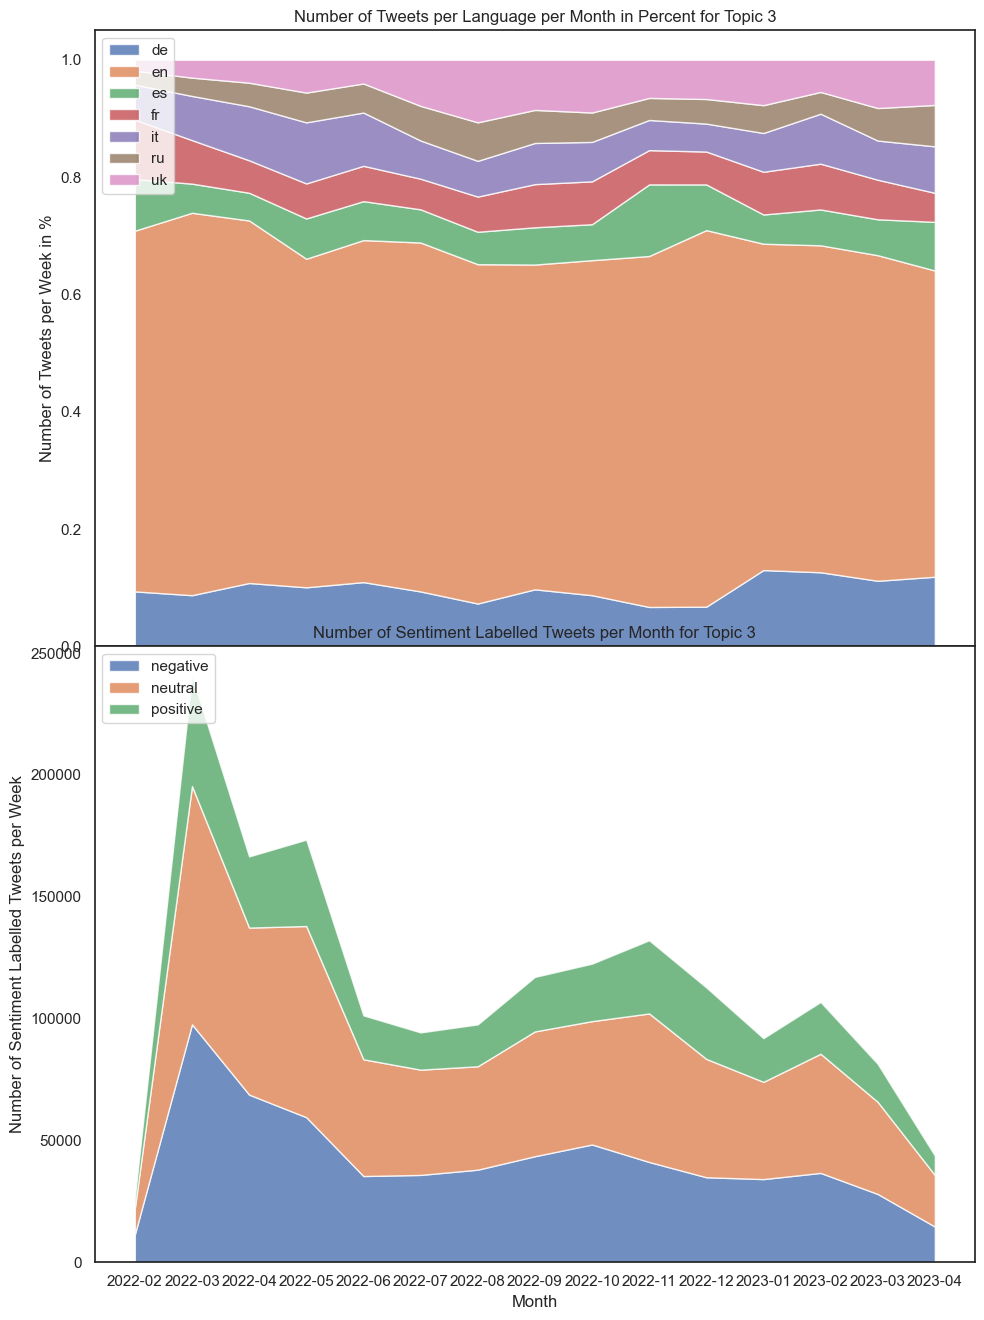

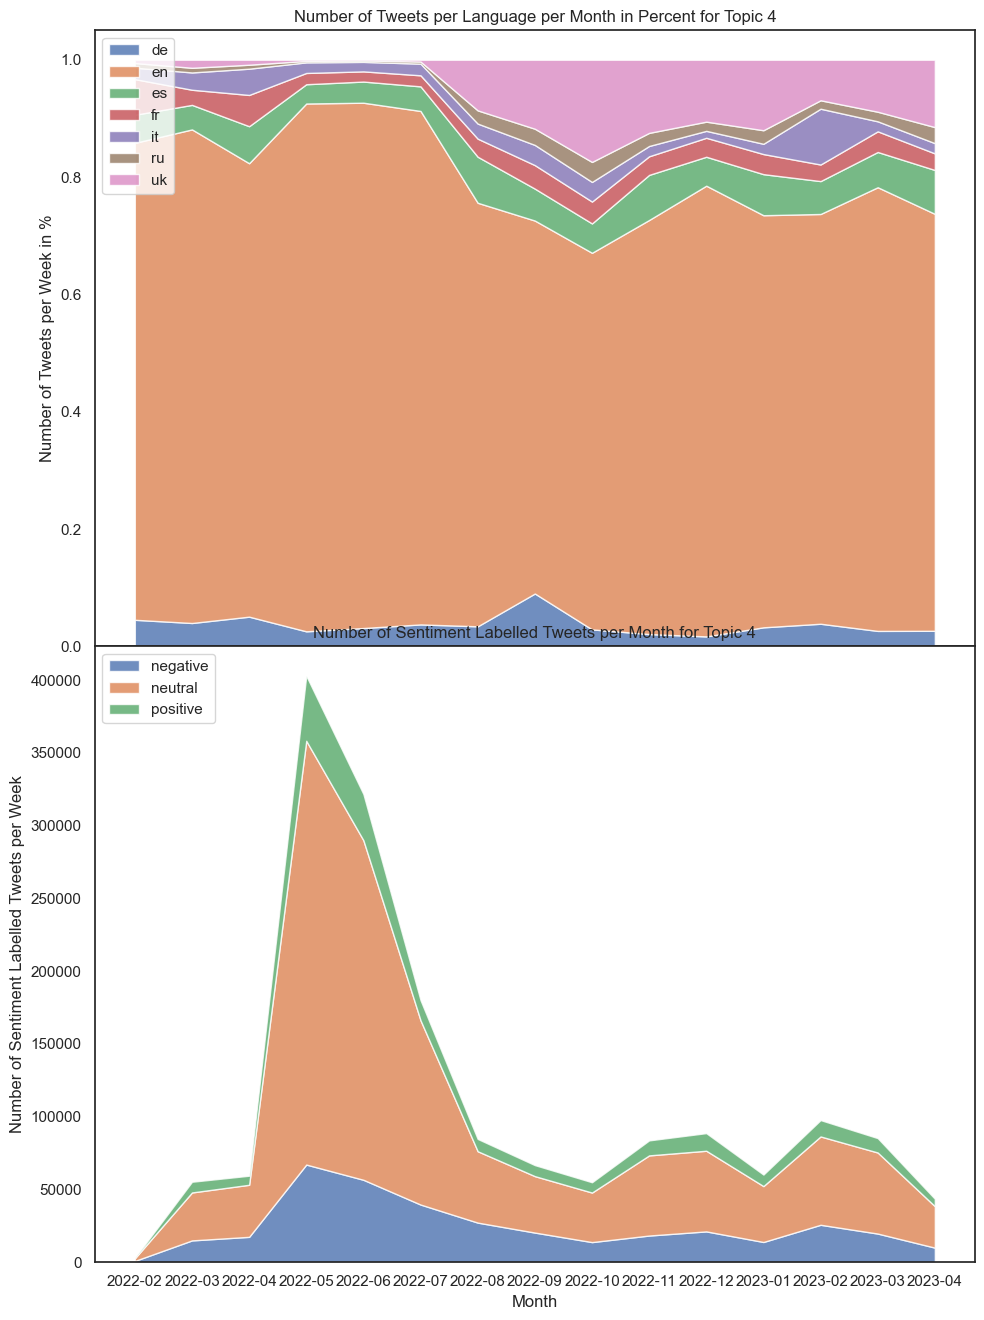

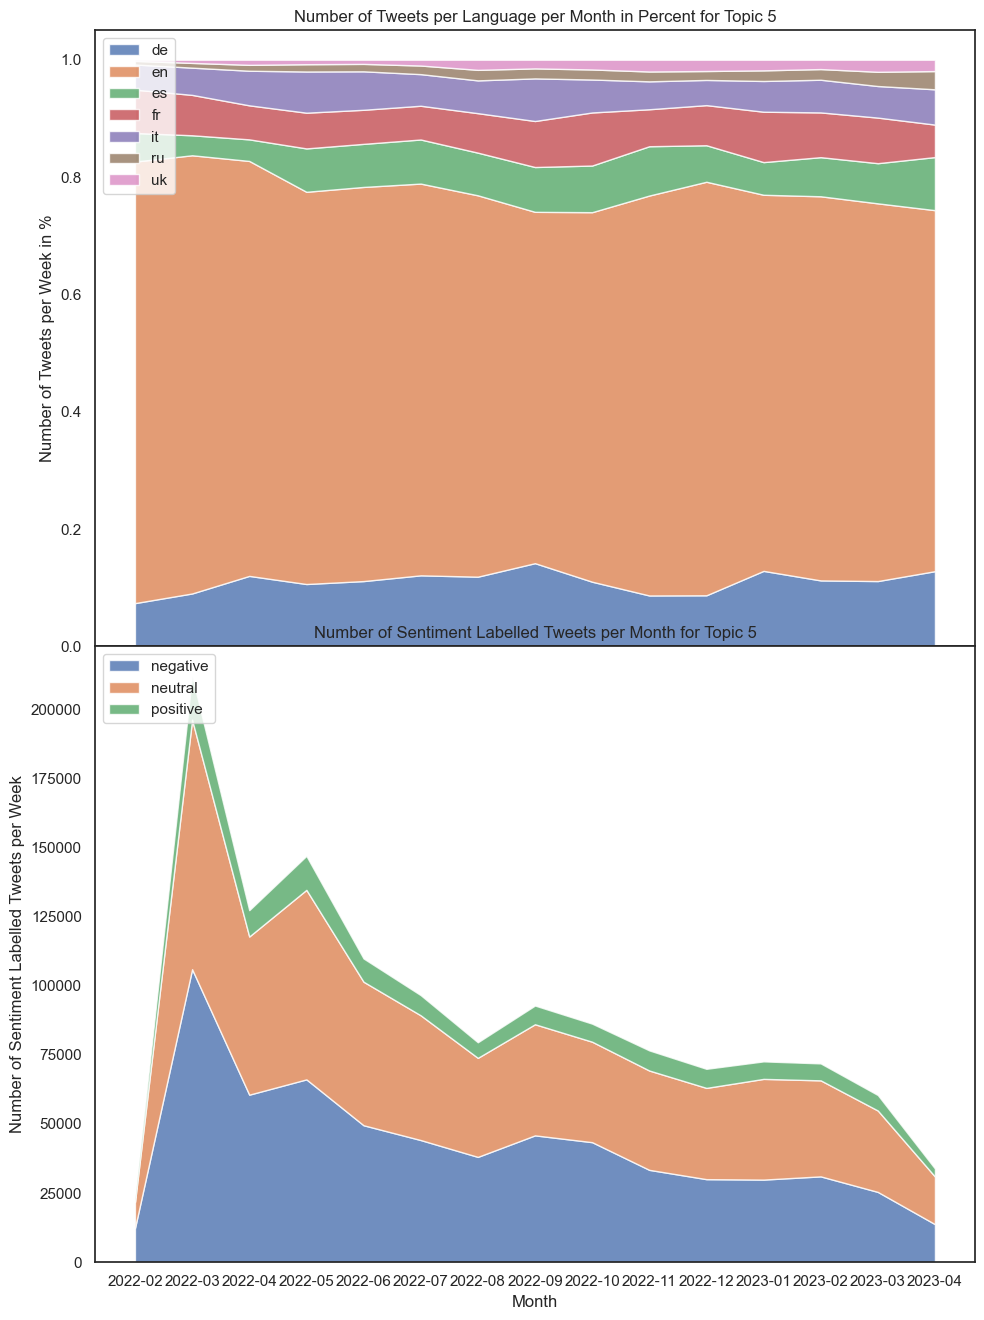

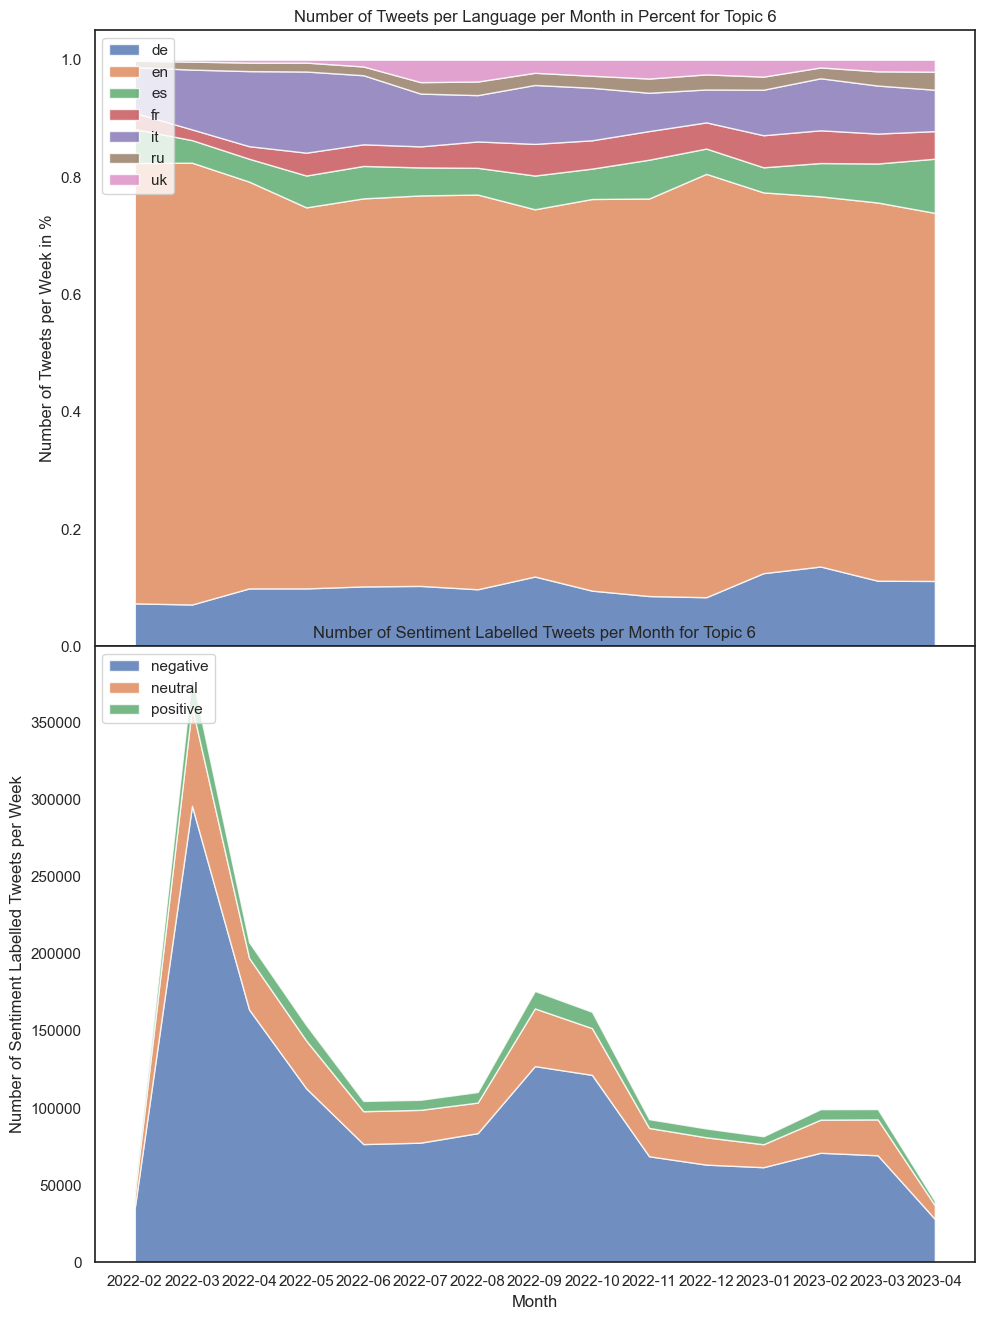

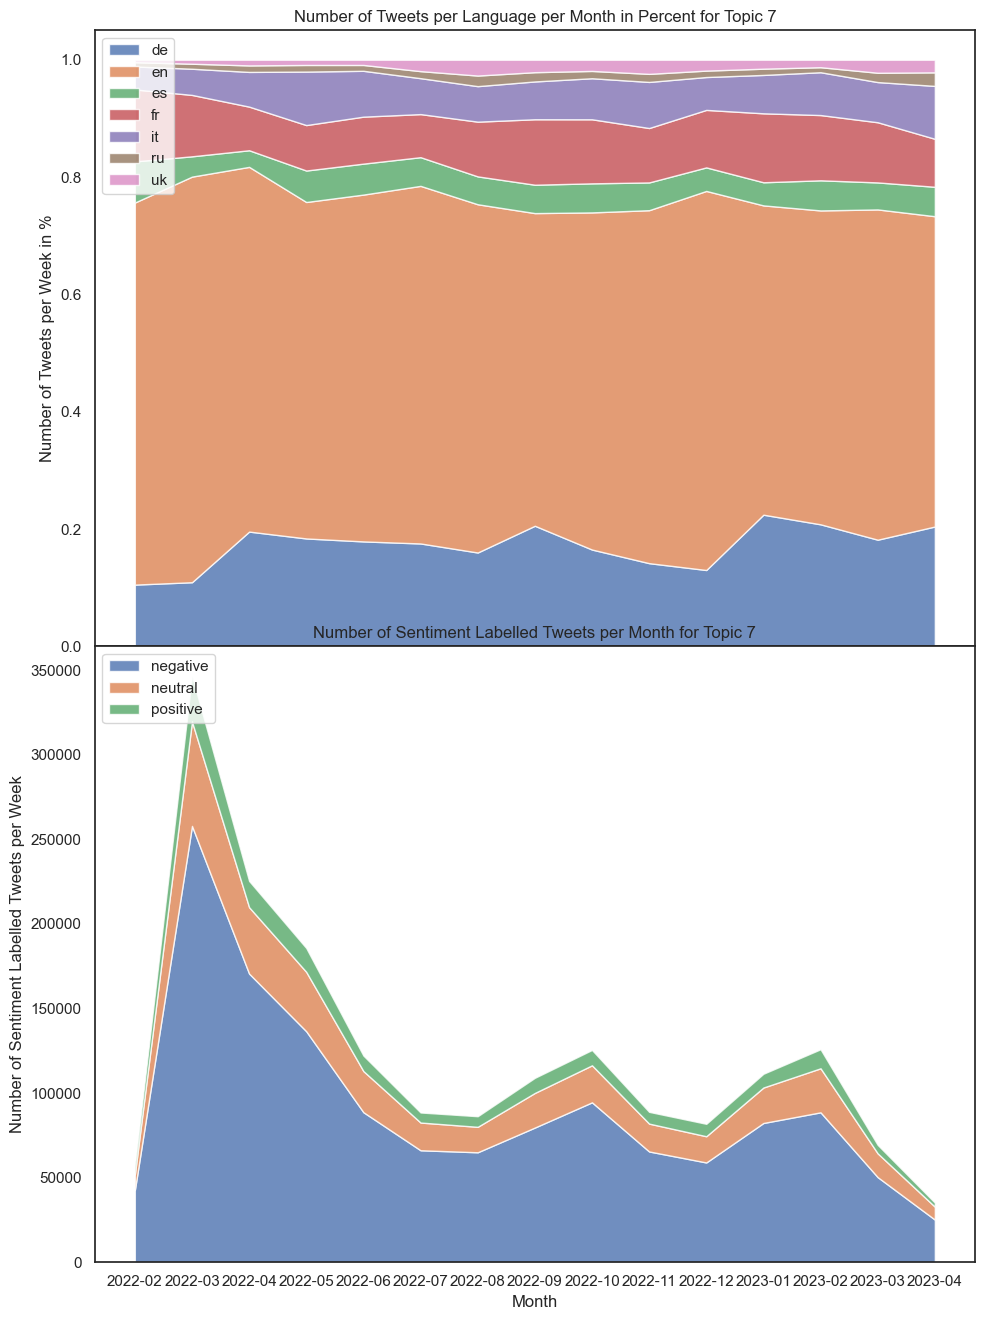

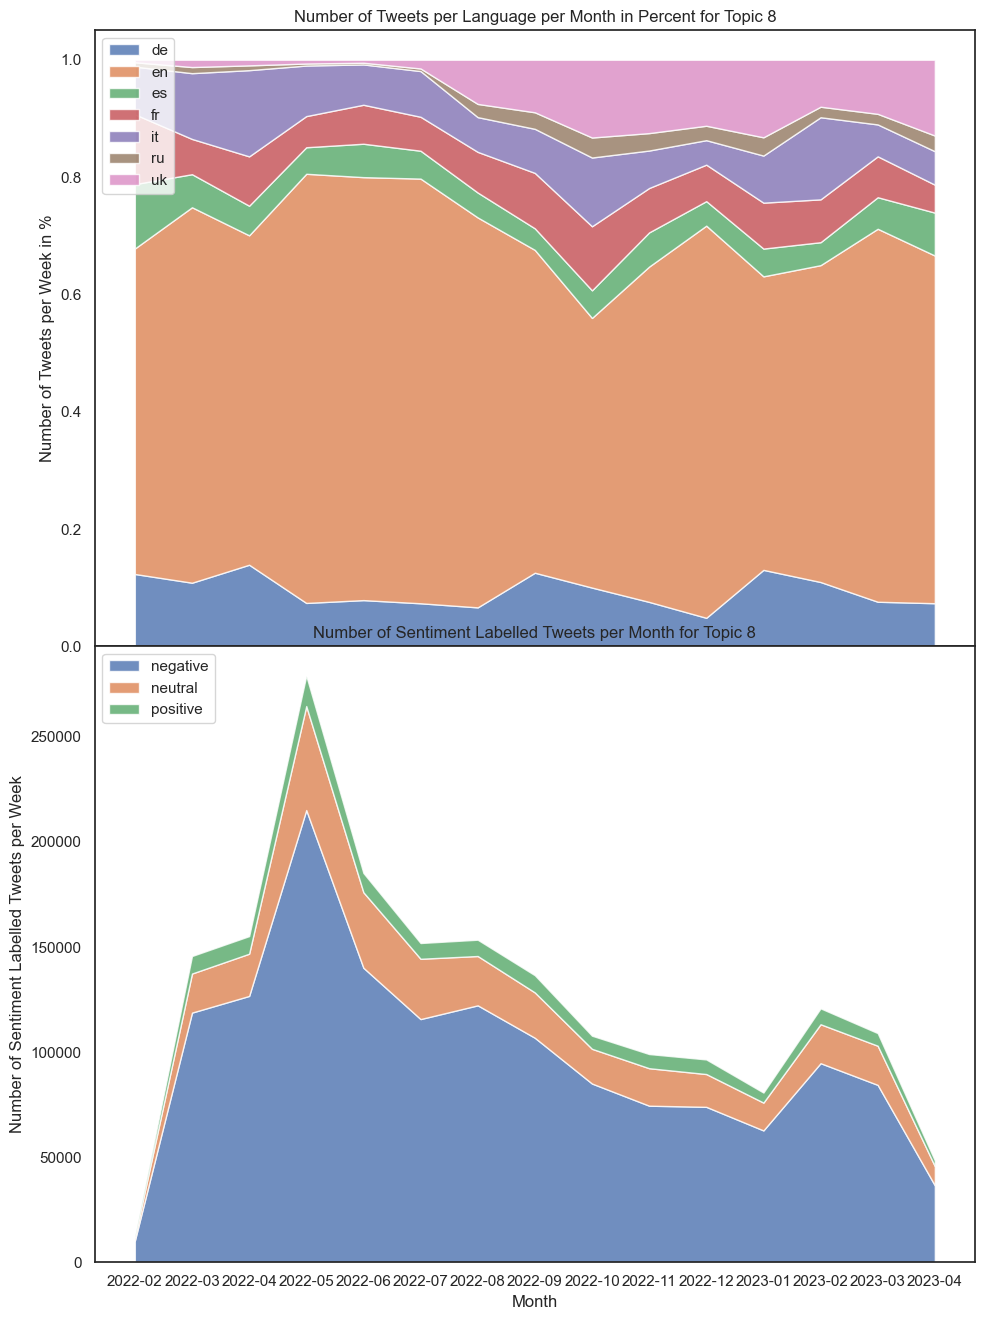

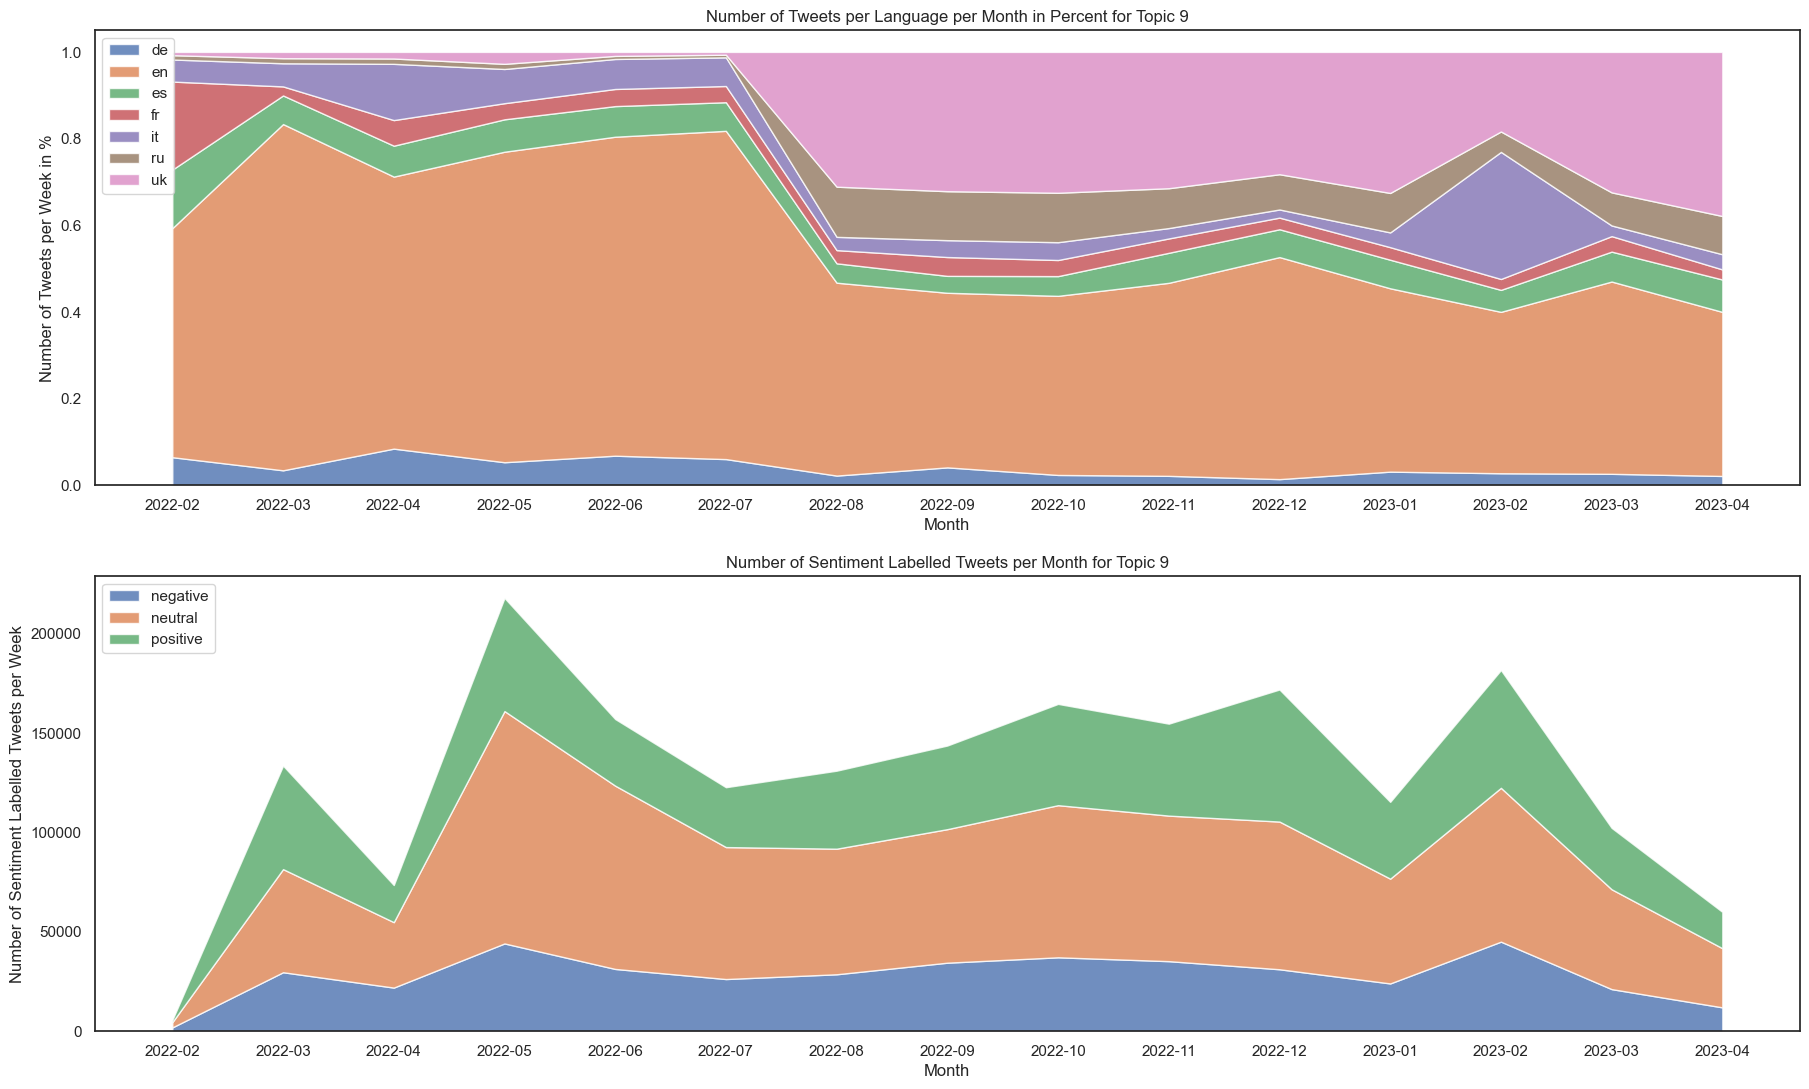

In [53]:
for topic in range(10):
    plots(df_lang, df_sentiments,topic= str(topic), save_path=f"/Users/robinfeldmann/TopicAnalysisRUWTweets/Graphs/TopicsTime/Topic_{topic}_lang_sent.svg")

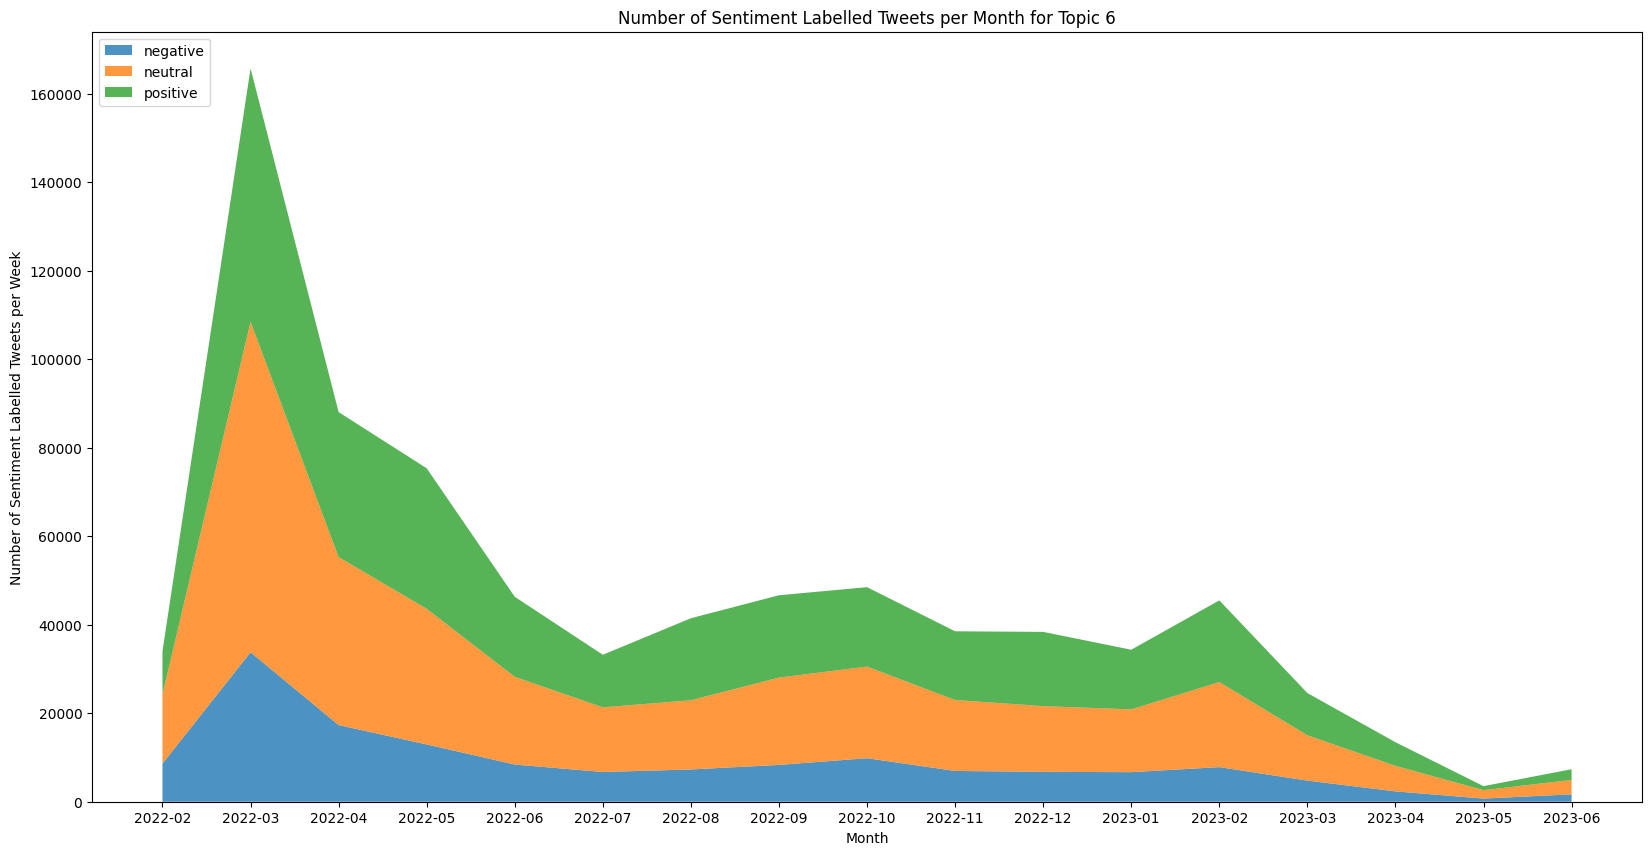

In [24]:
stackplot_topic_by_sentiment(df_sentiments, topic="6")

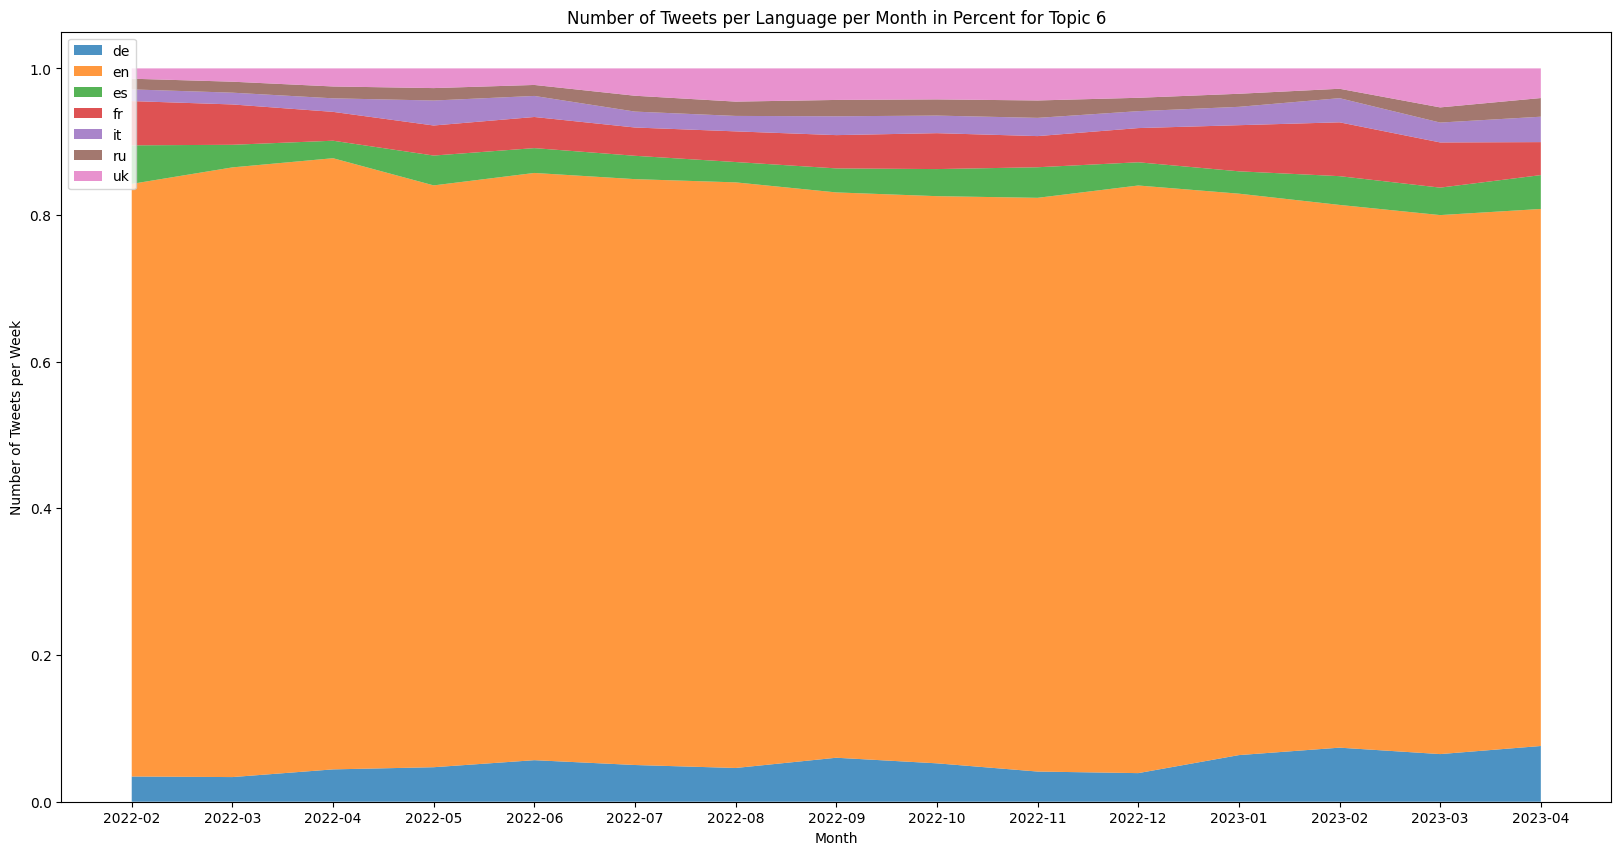

In [13]:
import matplotlib.pyplot as plt
import matplotlib


stackplot_topic_by_language(df_lang, topic="6")

/Users/robinfeldmann/TopicAnalysisRUWTweets/src/topic_eval.py:143: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(index)


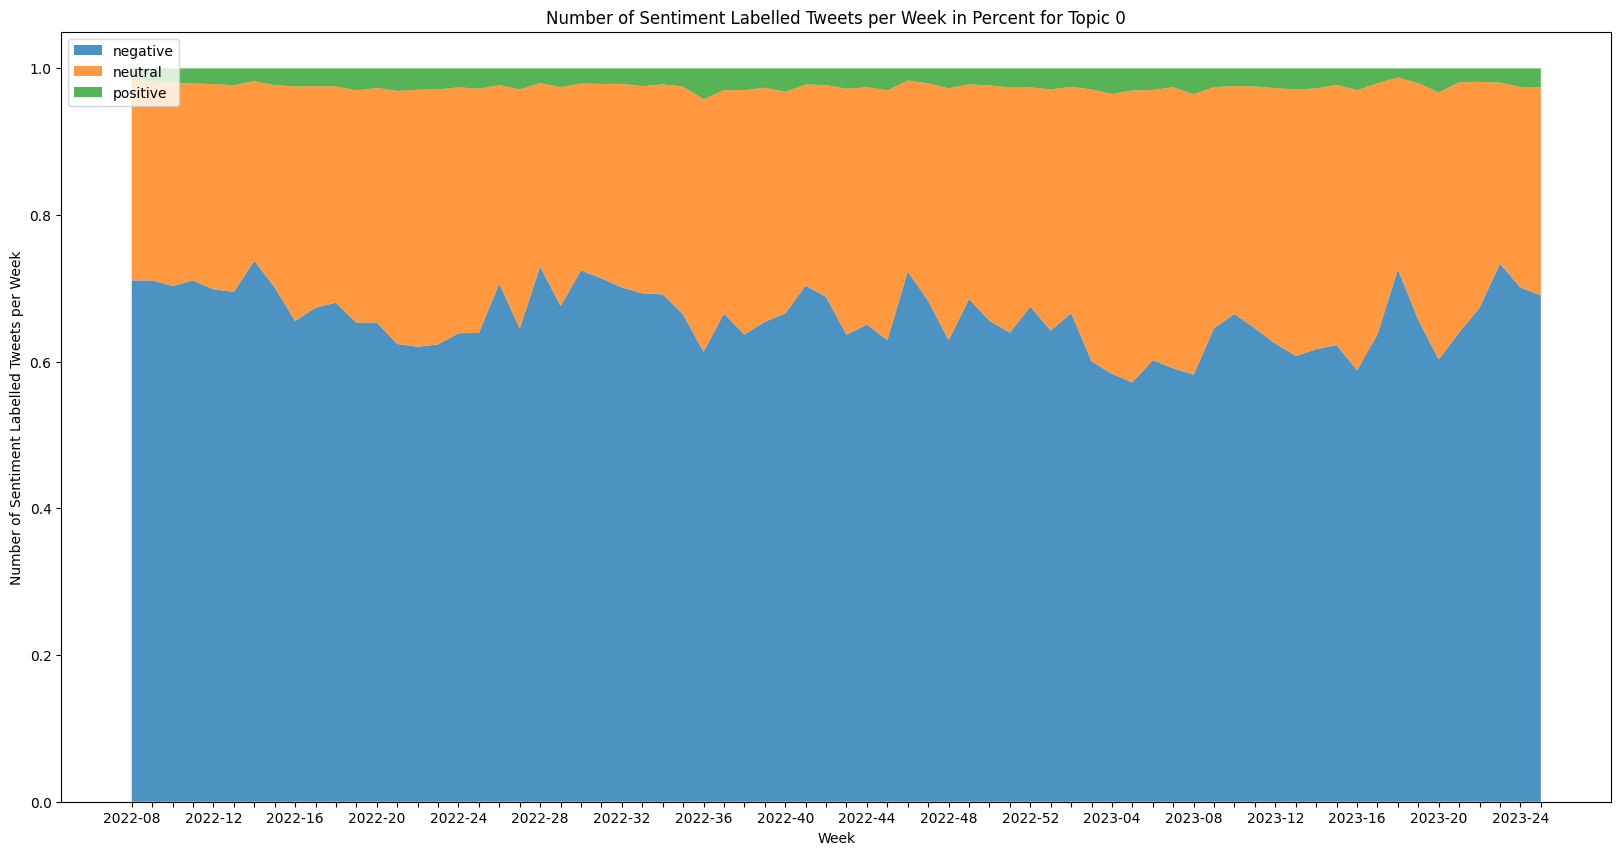

In [2]:
stackplot_topic_by_sentiment(df_sentiments, topic="0")